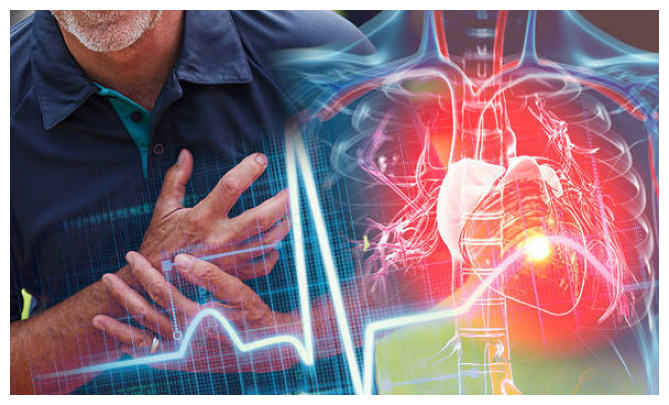

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/ASUS/Documents/3. Development Stuff/Data Analis Project/Python Scripts/Dataset/Image/Heart Attack.jpg')
plt.figure(figsize=(16,5))
plt.imshow(img, extent=[0, img.shape[1], img.shape[0], 0])
plt.axis('off')
plt.show()

image:Freepik.com

## Heart Attack Death Prediction using Random Forest

by : Elza Fr

"Welcome to the world of Heart Attack Death Prediction, where cutting-edge Random Forest algorithms work tirelessly to save lives. Each year, countless lives are affected by heart-related issues. With the Random Forest model, we're taking a big step towards early detection and intervention. Join us to explore the data, unravel the predictive magic, and understand how this technology can transform heart health.

Buckle up for a journey into the heart of predictive analytics. Heart Attack Death Prediction using Random Forest is about changing lives and creating a healthier world for us all."

In [1]:
#Import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## Data Preparation
Data Preparation is a fundamental step in the data science and machine learning process. It involves gaining insights into the structure, content, and characteristics of the dataset that will be used for analysis and modeling.
- Data Collection: Gathering data from various sources in different formats (structured or unstructured).
- Data Exploration: Analyzing data to understand its size, features, types, and distributions, often using EDA technique
- Domain Knowledge: Understanding the subject matter to guide data understanding and feature select.
- Column Renaming: Adjusting column names for clarity and consisatentcy.

In [2]:
# Import Dataset and Display Example of Data
df = pd.read_csv('Dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


atasets Description

Source : Kaggle.com

- age : Age
- anaemia : Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
- diabetes : If the patient has diabetes (boolean)
- ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure : If the patient has hypertension (boolean)
- platelets : Platelets in the blood (kiloplatelets/mL)
- serum_creatinine : Level of serum creatinine in the blood (mg/dL)
- serum_sodium : Level of serum sodium in the blood (mEq/L)
- sex : Woman or man (binary)
- smoking : If the patient smokes or not (boolean)
- time : Follow-up period (days)
- DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

In [3]:
# Info of General dataset to view null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Check for missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# Statistical Descriptive
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
# Check duplicated value
print('Sum of Duplicates :',df.duplicated().sum())

Sum of Duplicates : 0


In [8]:
# percentage of Death by heart attack
(df['DEATH_EVENT'].value_counts() / len(df) * 100).map('{:.2f}%'.format)

DEATH_EVENT
0    67.89%
1    32.11%
Name: count, dtype: object

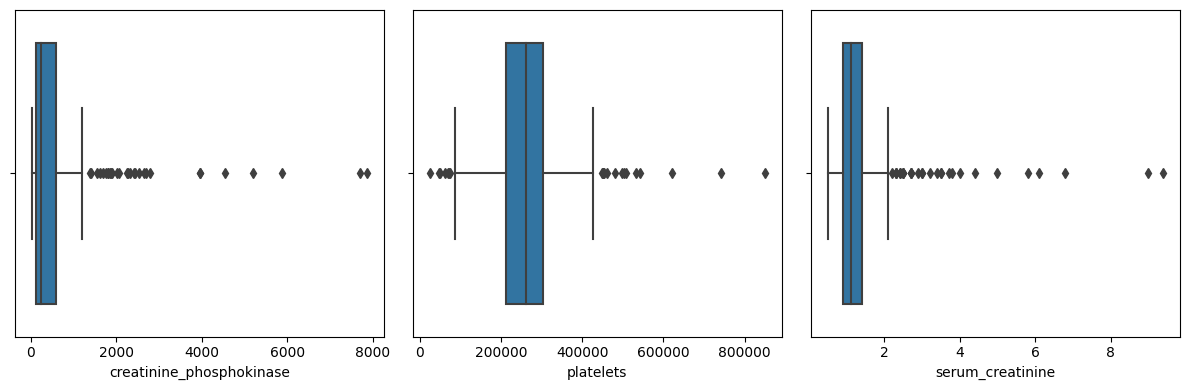

In [9]:
# Boxplot to see data outlier
fig, ax = plt.subplots(1,3,figsize=[12,4])

sns.boxplot(data=df, x='creatinine_phosphokinase',ax=ax[0])
sns.boxplot(data=df, x='platelets',ax=ax[1])
sns.boxplot(data=df, x='serum_creatinine',ax=ax[2])

plt.tight_layout()

In [10]:
# Check data columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
# lowering 
df.columns = [col.lower() for col in df.columns]

df.rename(columns={'high_blood_pressure':'blood_pressure'},inplace=True)

# Data Visualization
In essence, data visualization is a versatile tool that enhances data understanding, supports decision-making, and facilitates effective communication of insights across a wide range of applications

Data Visualization is very important step to gathering more insight of the Data. The following Visual plot below have function like :
- presenting univariate data distribution
- visualizing categorical data
- see distribution of numerical data across different categories
- comparation function

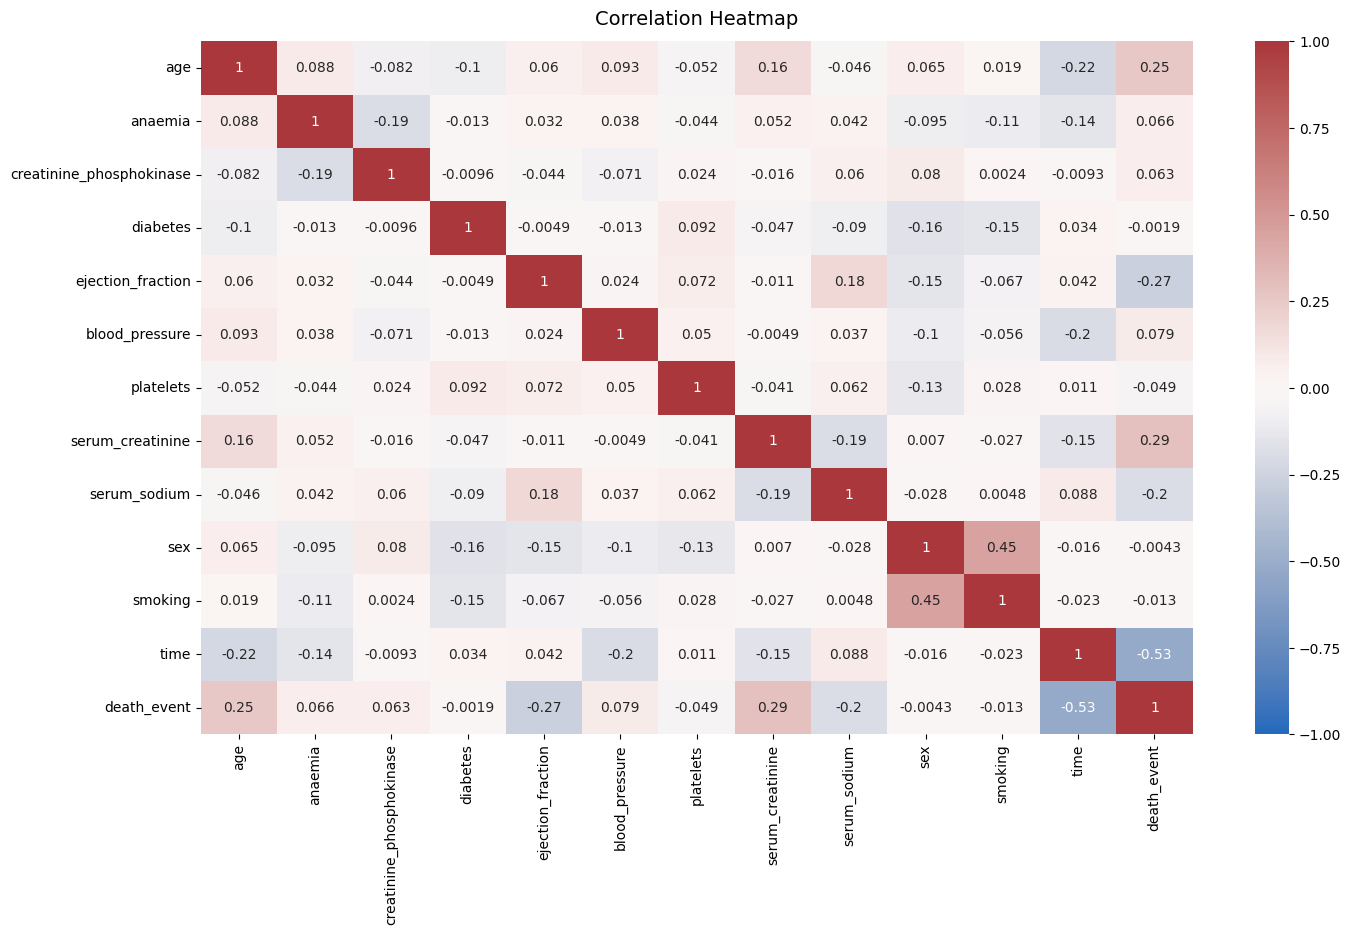

In [12]:
# Heatmap over the columns correlation
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<Axes: xlabel='age', ylabel='Count'>

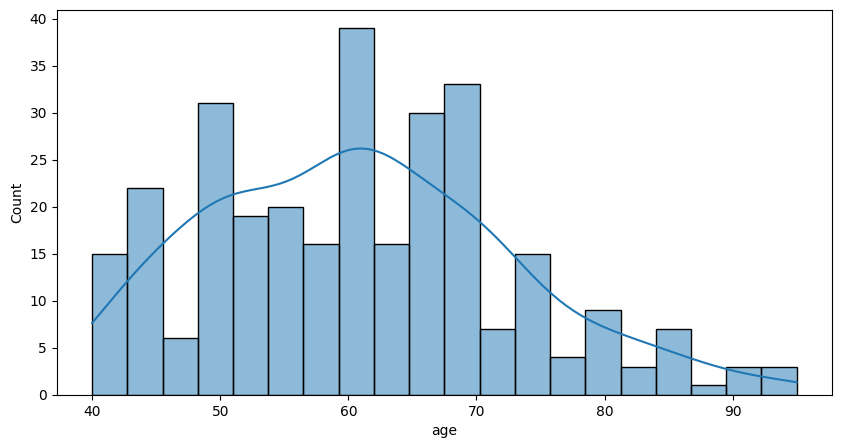

In [13]:
# See Heart Attack Data via Histogram
plt.figure(figsize=[10,5])
sns.histplot(data=df, x='age', bins=20, kde=True)

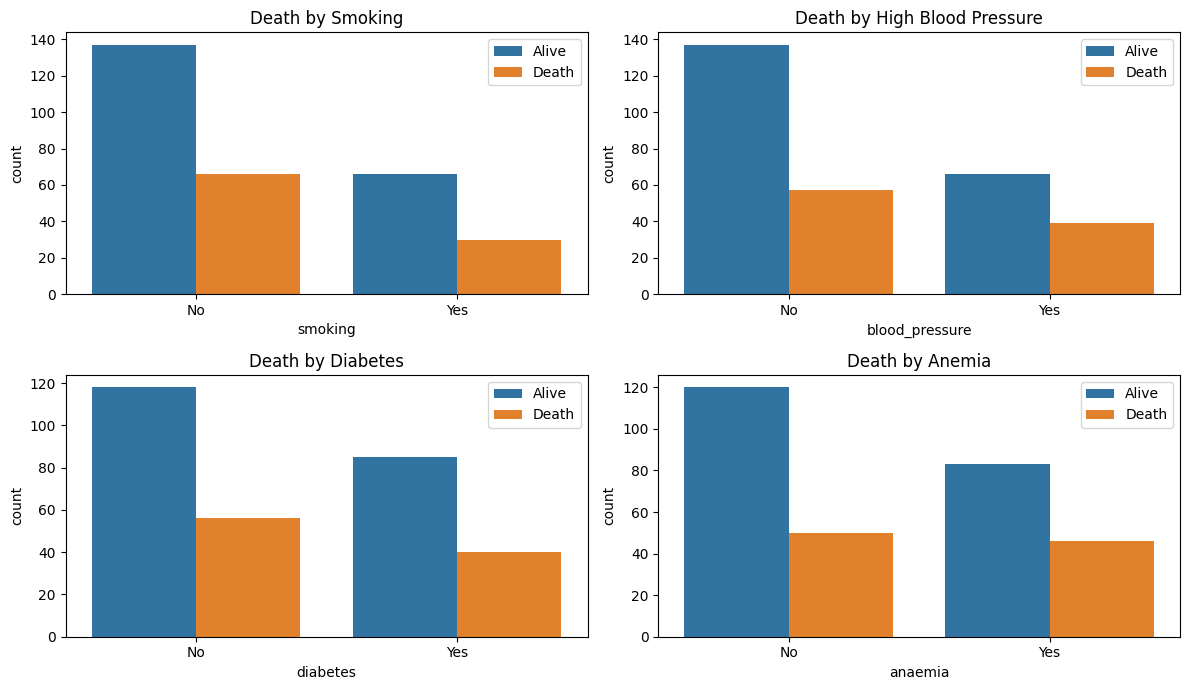

In [14]:
# Display Barplot for graphical representation
fig, ax = plt.subplots(2,2,figsize=[12,7])

sns.countplot(data=df, x='smoking', hue='death_event', ax=ax[0,0])
ax[0,0].set_xticklabels(['No','Yes'])
ax[0,0].legend(['Alive','Death'])
ax[0,0].set_title('Death by Smoking')

sns.countplot(data=df, x='blood_pressure', hue='death_event', ax=ax[0,1])
ax[0,1].set_xticklabels(['No','Yes'])
ax[0,1].legend(['Alive','Death'])
ax[0,1].set_title('Death by High Blood Pressure')

sns.countplot(data=df, x='diabetes', hue='death_event', ax=ax[1,0])
ax[1,0].set_xticklabels(['No','Yes'])
ax[1,0].legend(['Alive','Death'])
ax[1,0].set_title('Death by Diabetes')

sns.countplot(data=df, x='anaemia', hue='death_event', ax=ax[1,1])
ax[1,1].set_xticklabels(['No','Yes'])
ax[1,1].legend(['Alive','Death'])
ax[1,1].set_title('Death by Anemia')

plt.tight_layout()
plt.show()

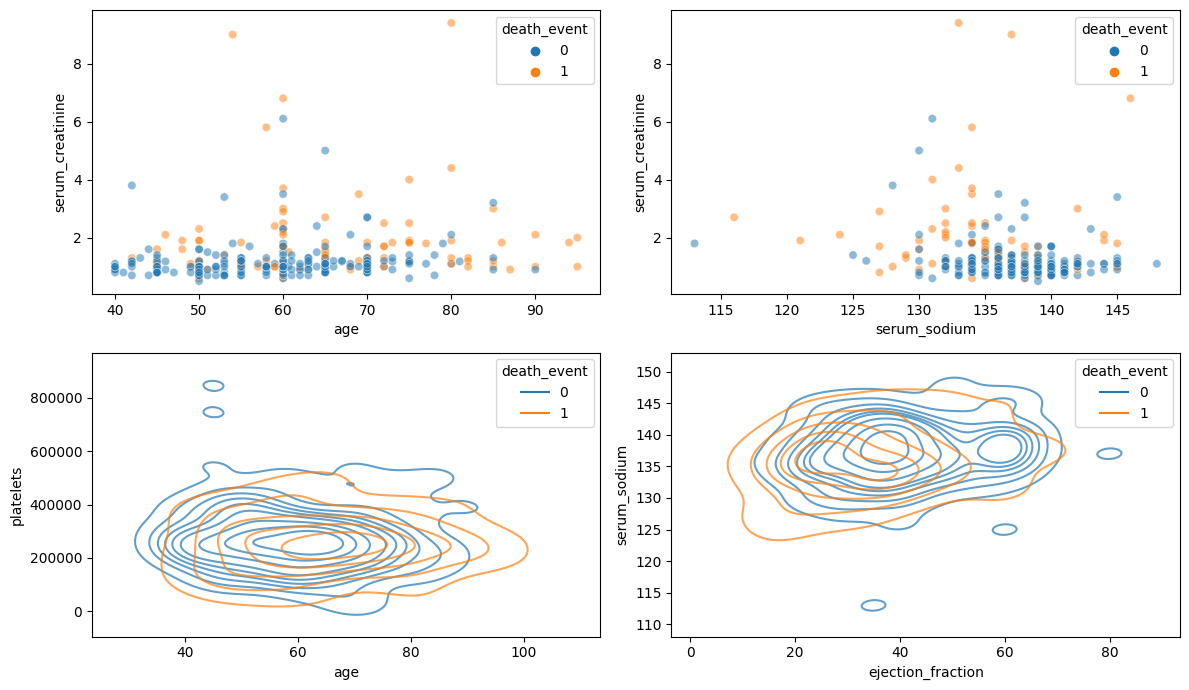

In [15]:
# 
fig, ax = plt.subplots(2,2,figsize=[12,7])

sns.scatterplot(data=df, x='age', y='serum_creatinine', hue='death_event', alpha=0.5, ax=ax[0,0])
sns.scatterplot(data=df, x='serum_sodium', y='serum_creatinine', hue='death_event', alpha=0.5, ax=ax[0,1])
sns.kdeplot(data=df, x='age', y='platelets', hue='death_event', alpha=0.7, ax=ax[1,0])
sns.kdeplot(data=df, x='ejection_fraction', y='serum_sodium', hue='death_event', alpha=0.7, ax=ax[1,1])

plt.tight_layout()
plt.show()

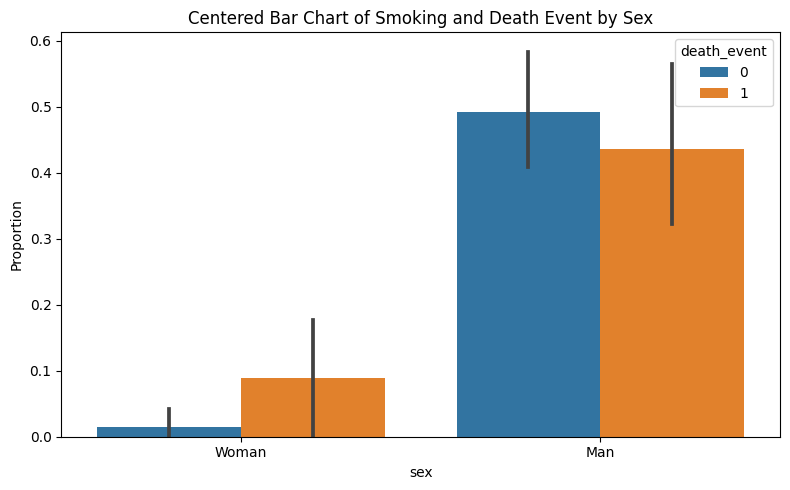

In [16]:
plt.figure(figsize=[8,5])

bar_plot = sns.barplot(data=df, x="sex", y="smoking", hue="death_event")

plt.ylabel("Proportion")
plt.title("Centered Bar Chart of Smoking and Death Event by Sex")
plt.xticks([0, 1], ['Woman', 'Man'])

plt.tight_layout()
plt.show()

In the context of "Smoking and Death Event by Sex," a centered bar chart would typically display data about smoking habits and the occurrence of death events, centered around the different sexes (e.g., male and female)

Plot Explain :

- KDE Plot : A KDE plot shows the distribution of data with a smooth curve.
It highlights where data is most common and where it's less so.

- Scatter Plot : A scatter plot displays data points on a graph.
It helps visualize relationships or patterns between two variables.

- Barplot : A barplot uses bars to show and compare values or quantities of different categories.
It's a simple way to visualize data differences between groups.

# Data Preprocessing

Data preprocessing is a critical step in the data analysis and machine learning pipeline. It involves a series of actions and transformations applied to raw data to prepare it for analysis or modeling.

- Clipping data using the Interquartile Range (IQR) and the first quartile (Q1) and third quartile (Q3) is a common technique to identify and handle outliers in a dataset.

- Determining independet and Dependent variabel gonna shapes the research process, guides the selection of appropriate methods, and allows for the testing of hypotheses and the interpretation of results.

-  then we gonna split the Dataset into Test and Train. It allows us to assess a model's performance on unseen data, ensuring that it generalizes effectively. Proper random splitting and considerations for class balance and reproducibility are essential for robust model evaluation and development.

In [17]:
# Clipping the Outlier Value

Q1_cph = df['creatinine_phosphokinase'].quantile(0.25)
Q3_cph = df['creatinine_phosphokinase'].quantile(0.75)
IQR_cph = Q3_cph - Q1_cph
Lwishker_cph = Q1_cph - 1.5 * IQR_cph
Uwishker_cph = Q3_cph + 1.5 * IQR_cph

df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].clip(Lwishker_cph, Uwishker_cph)

Q1_plt = df['platelets'].quantile(0.25)
Q3_plt = df['platelets'].quantile(0.75)
IQR_plt = Q3_plt - Q1_plt
Lwishker_plt = Q1_plt - 1.5 * IQR_plt
Uwishker_plt = Q3_plt + 1.5 * IQR_plt

df['platelets'] = df['platelets'].clip(Lwishker_plt, Uwishker_plt)

Q1_src = df['serum_creatinine'].quantile(0.25)
Q3_src = df['serum_creatinine'].quantile(0.75)
IQR_src = Q3_src - Q1_src
Lwishker_src = Q1_src - 1.5 * IQR_src
Uwishker_src = Q3_src + 1.5 * IQR_src

df['serum_creatinine'] = df['serum_creatinine'].clip(Lwishker_src, Uwishker_src)
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,424.214883,0.418060,38.083612,0.351171,259163.714883,1.234515,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,385.449328,0.494067,11.834841,0.478136,81478.304369,0.440098,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,80.000000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
# Set features and target variabel
x = df.drop('death_event', axis=1)
y = df['death_event']

In [19]:
# Set Train and Test split for Independent and Dependent Variabel
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

# Data Modelling

Data modeling using a Random Forest classifier is a machine learning process that involves creating a predictive model to classify or categorize data. Random Forest is an ensemble learning technique that builds multiple decision trees during training and combines their predictions to create a more accurate and robust model.

#### Random Forest - Round 1
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [20]:
# Adjusting best params for Logistic Regression modelling
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [21]:
# Adjusting best params for Random Forest Classifier Modelling
param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}

rf_Model = RandomForestClassifier()

grid_search = GridSearchCV(rf_Model, param_grid, cv=3, n_jobs=4, verbose=2)

grid_search.fit(x_train, y_train)

In [25]:
# Deploying best params into model parameter
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [26]:
# Evaluation Score for that model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall (Sensitivity): {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8666666666666667
Precision: 0.9
Recall (Sensitivity): 0.6428571428571429
F1 Score: 0.75
ROC-AUC: 0.8052995391705069


#### Feature Engineering

Feature engineering is the process of creating and transforming features to enhance a machine learning model's performance. Because the recall score is quite low, so we try to adjust recall scoring using gridsearch. 

Adjusting the scoring metric to 'recall' in GridSearchCV prioritizes the model's ability to correctly identify positive instances, which is valuable in scenarios where missing positive cases is more costly or harmful than false positives.

In [68]:
# Involve scoring to adjust best params for Random Forest Classifier Modelling
grid_search = GridSearchCV(rf_Model, param_grid, cv=3, n_jobs=4, scoring='recall', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='recall', verbose=2)

In [71]:
# Deploying best params into model parameter
best_model = grid_search.best_estimator_
y_pred = (best_model.predict_proba(x_test)[:, 1] > 0.36)

In [72]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall (Sensitivity): {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# ROC-AUC (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8666666666666667
Precision: 0.75
Recall (Sensitivity): 0.8571428571428571
F1 Score: 0.7999999999999999
ROC-AUC: 0.8640552995391705


#### Confusion Matrix

A confusion matrix is a table used in classification to evaluate the performance of a machine learning model. It is a square matrix that allows you to compare the actual (true) class labels of a dataset with the predicted class labels generated by a model.

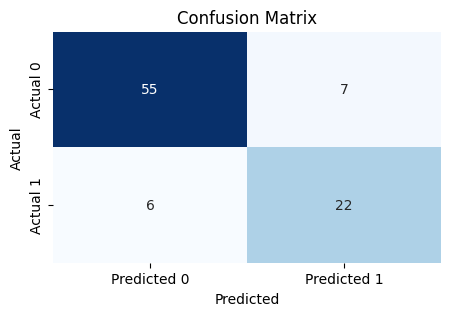

In [53]:
# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

A confusion matrix for predicting "death by heart attack" typically involves a binary classification scenario :

- True Negatives (TN): This represents the number of cases correctly predicted as "No Death" by a heart attack.
- True Positives (TP): These are the cases correctly predicted as "Death" by a heart attack.
- False Negatives (FN): These are cases that were incorrectly predicted as "No Death" but are actual "Death" cases.
- False Positives (FP): These are cases that were incorrectly predicted as "Death" by a heart attack but are actual No Death cases.

For exploratory purpose, you might want to inspect the splits of the most important features in the random forest model. 

-------------------------------------------------------------------------------------------------------------------------------------------------------

Summary :

The "Death by Heart Attack Prediction using Random Forest Classifier" is a crucial application of machine learning in healthcare, aiding in the early detection of individuals at risk of a fatal heart attack. This predictive model empowers medical professionals to provide targeted care and intervention, potentially saving lives by mitigating the risk of such life-threatening events.

__Thanks for Attention, hope this analysis get u some great insight__